In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Reading Data

In [2]:
df = pd.read_csv('Sales_.csv')

In [3]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


# Dealing with Missing Values

In [5]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [6]:
df[df['TV'].isnull()]

,TV,Radio,Social Media,Influencer,Sales
13,NaN,22.351667,3.031815,Mega,276.165351
26,NaN,34.111674,4.624148,Nano,342.913372
46,NaN,34.859637,7.781417,Mega,318.969784
75,NaN,6.482293,0.866845,Macro,91.177216
99,NaN,7.635819,1.554146,Macro,56.186730
119,NaN,30.470485,6.806919,Micro,336.818690
141,NaN,9.164464,1.096681,Macro,65.259189
163,NaN,38.118424,6.676611,Micro,328.555184
183,NaN,1.287060,0.396179,Macro,56.545293
210,NaN,17.007075,5.199635,Macro,208.816382


In [7]:
df.shape

(4572, 5)

In [8]:
df.dropna(how='any',inplace = True)

In [9]:
df.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [10]:
df.shape

(4546, 5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


# Exploratory Data Analysis

In [12]:
sns.set_style('darkgrid')

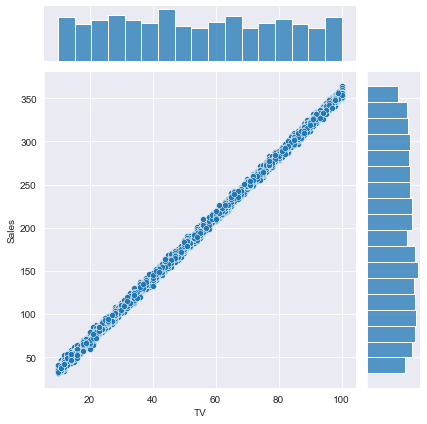

In [13]:
sns.jointplot(x='TV', y='Sales', data=df)

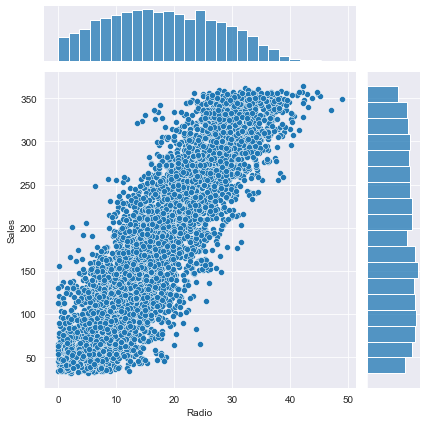

In [14]:
sns.jointplot(x='Radio', y='Sales', data=df)

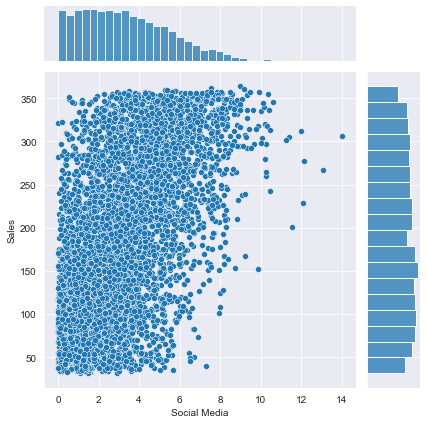

In [15]:
sns.jointplot(x='Social Media', y='Sales', data=df)

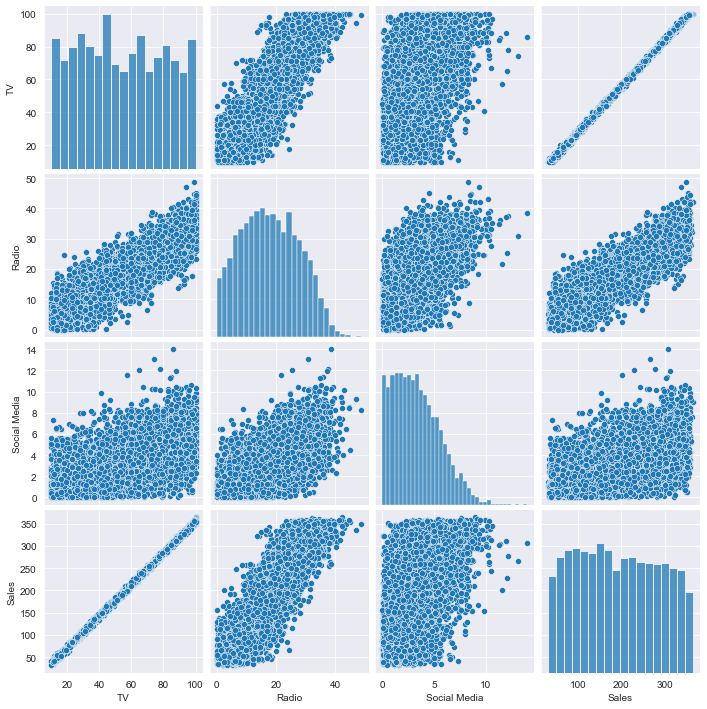

In [16]:
sns.pairplot(df)

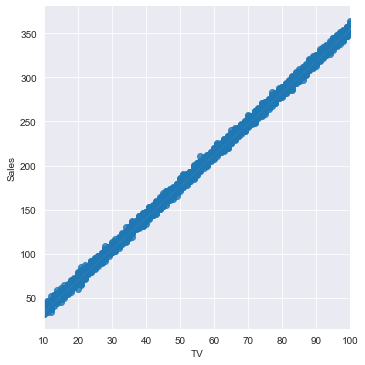

In [17]:
sns.lmplot(x='TV', y='Sales', data=df)

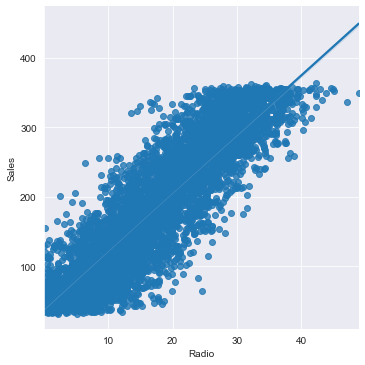

In [18]:
sns.lmplot(x='Radio', y='Sales', data=df)

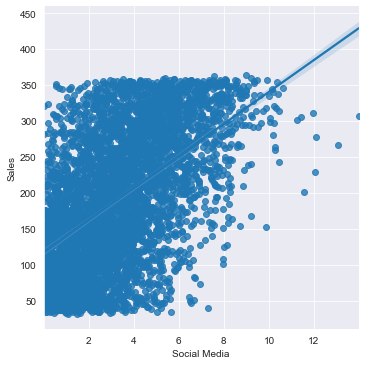

In [19]:
sns.lmplot(x='Social Media', y='Sales', data=df)

# Deciding Independent Variables

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4546 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4546 non-null   float64
 1   Radio         4546 non-null   float64
 2   Social Media  4546 non-null   float64
 3   Influencer    4546 non-null   object 
 4   Sales         4546 non-null   float64
dtypes: float64(4), object(1)
memory usage: 213.1+ KB


In [21]:
#Independent Variable
X = df[['TV', 'Radio', 'Social Media']]

#Dependent Variables
y = df['Sales']

# Train - Test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
X_train

,TV,Radio,Social Media
2468,34.0,7.666726,0.319328
2744,26.0,2.170693,0.057924
3090,70.0,22.174495,1.088762
2814,53.0,18.850814,4.566441
383,16.0,1.114216,0.124306
...,...,...,...
124,38.0,8.872275,1.605213
2683,20.0,7.518264,1.381465
1442,94.0,37.633398,3.593899
4015,45.0,10.974134,0.165896


In [25]:
X_test

,TV,Radio,Social Media
4088,41.0,7.143985,1.185990
1216,46.0,14.392378,1.240397
2478,11.0,3.538664,0.828502
3391,68.0,26.990611,2.552595
1482,46.0,24.517573,1.461142
...,...,...,...
104,30.0,8.421995,3.279481
3538,79.0,28.990040,5.706564
364,46.0,3.159830,4.261810
3681,39.0,5.044618,2.012806


# Training the Algorithm

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
X.columns

Index(['TV', 'Radio', 'Social Media'], dtype='object')

In [30]:
lr.coef_

array([ 3.56192521e+00, -3.80866417e-03, -5.66872737e-04])

In [31]:
lr.intercept_

-0.0959203376874882

# Testing the algorithm

In [32]:
predictions = lr.predict(X_test)
predictions

array([145.9151319 , 163.69712041,  39.07130973, ..., 163.73818866,
       138.79880857, 323.93194735])

# Model Evaluation

Text(0, 0.5, 'Predictions')

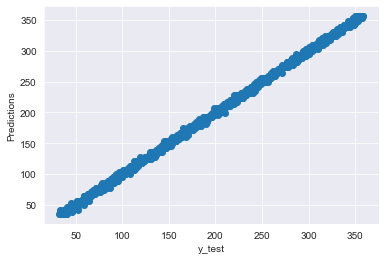

In [33]:
plt.scatter(y_test, predictions)
plt.xlabel("y_test") #Actual output
plt.ylabel("Predictions") #ML Predictions

In [34]:
from sklearn import metrics

In [35]:
metrics.mean_absolute_error(y_test, predictions)

2.3771711706111436

In [36]:
metrics.mean_squared_error(y_test, predictions)

8.815483496925083

In [37]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

2.9690879907683914

# Saving algorithm

In [38]:
import pickle

In [39]:
pickle.dump(lr,open('sales model.pkl','wb'))

# Testing Saved Algorithm

In [40]:
loadedModel = pickle.load(open('sales model.pkl','rb'))

In [41]:
loadedModel

LinearRegression()

In [42]:
X.columns

Index(['TV', 'Radio', 'Social Media'], dtype='object')

In [43]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [44]:
loadedModel.predict([[16,6,3]])[0]

56.87033040801054